# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [53]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#initialize the training, validation and testing data variables

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [54]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.shape[0]

print("Number of training examples   =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples    =", n_test)
print("Image data shape              =", image_shape)
print("Number of classes             =", n_classes)

Number of training examples   = 34799
Number of validation examples = 4410
Number of testing examples    = 12630
Image data shape              = (32, 32, 3)
Number of classes             = 34799


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [55]:
# read traffic sign labels from 'signnames.csv'
import csv
traffic_sign_names = []

with open('signnames.csv') as csvfile:
    signnames = csv.reader(csvfile,delimiter=',')
    for row in signnames:
        traffic_sign_names.append(row[1])
traffic_sign_names.pop(0);
#print(traffic_sign_names)

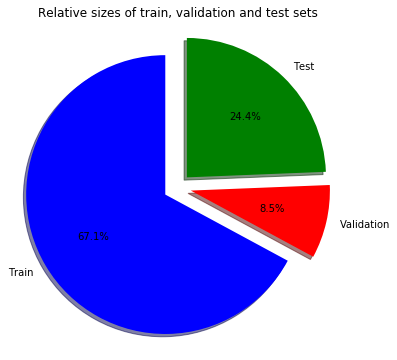

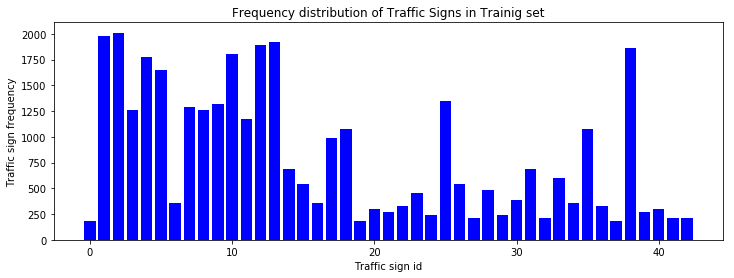

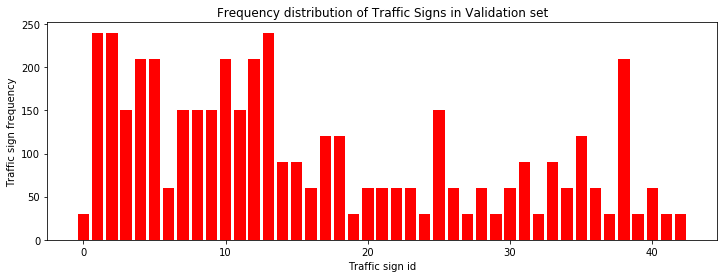

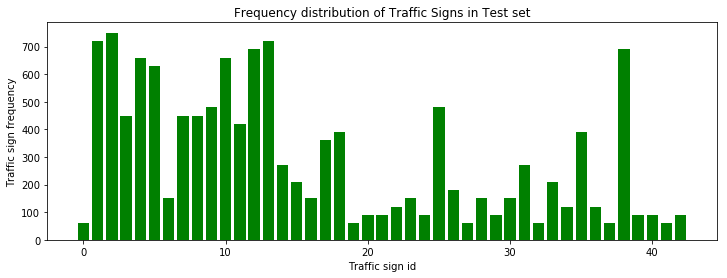

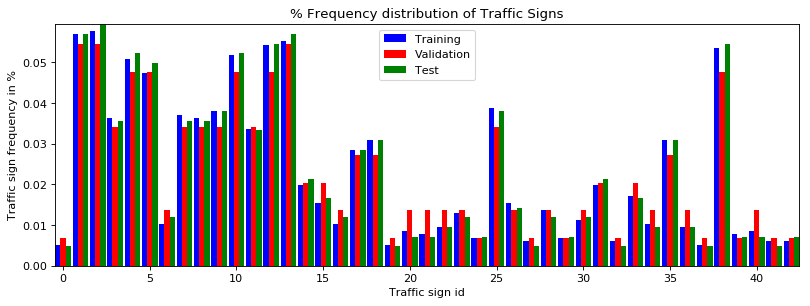

Traffic Sign 0: Speed limit (20km/h),  count:180 


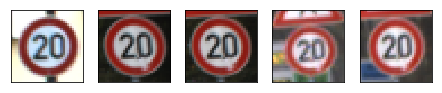

Traffic Sign 1: Speed limit (30km/h),  count:1980 


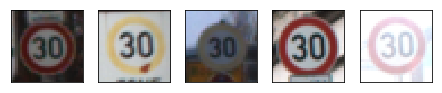

Traffic Sign 2: Speed limit (50km/h),  count:2010 


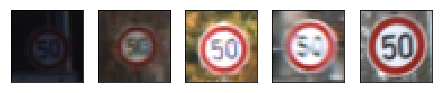

Traffic Sign 3: Speed limit (60km/h),  count:1260 


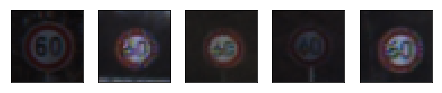

Traffic Sign 4: Speed limit (70km/h),  count:1770 


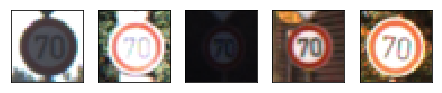

Traffic Sign 5: Speed limit (80km/h),  count:1650 


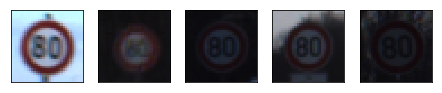

Traffic Sign 6: End of speed limit (80km/h),  count:360 


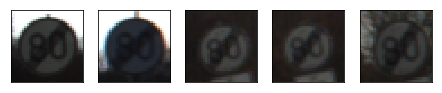

Traffic Sign 7: Speed limit (100km/h),  count:1290 


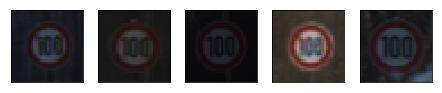

Traffic Sign 8: Speed limit (120km/h),  count:1260 


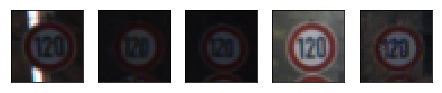

Traffic Sign 9: No passing,  count:1320 


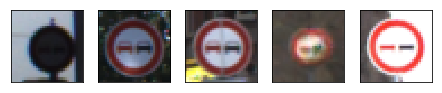

Traffic Sign 10: No passing for vehicles over 3.5 metric tons,  count:1800 


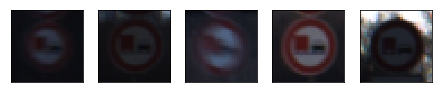

Traffic Sign 11: Right-of-way at the next intersection,  count:1170 


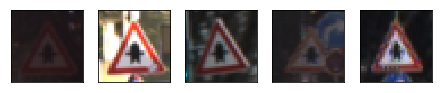

Traffic Sign 12: Priority road,  count:1890 


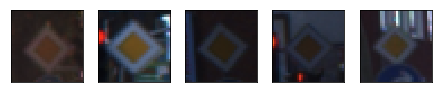

Traffic Sign 13: Yield,  count:1920 


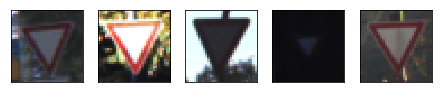

Traffic Sign 14: Stop,  count:690 


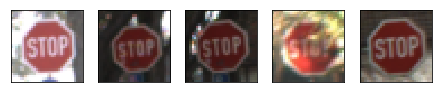

Traffic Sign 15: No vehicles,  count:540 


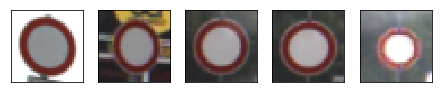

Traffic Sign 16: Vehicles over 3.5 metric tons prohibited,  count:360 


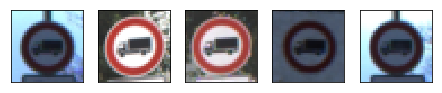

Traffic Sign 17: No entry,  count:990 


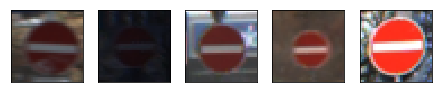

Traffic Sign 18: General caution,  count:1080 


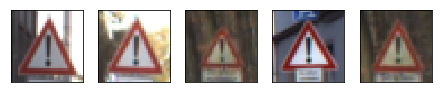

Traffic Sign 19: Dangerous curve to the left,  count:180 


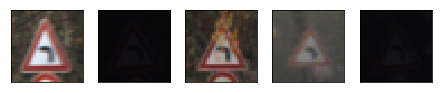

Traffic Sign 20: Dangerous curve to the right,  count:300 


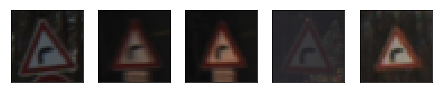

Traffic Sign 21: Double curve,  count:270 


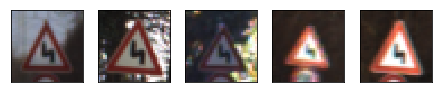

Traffic Sign 22: Bumpy road,  count:330 


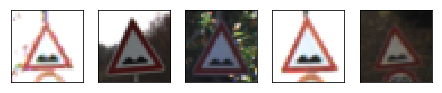

Traffic Sign 23: Slippery road,  count:450 


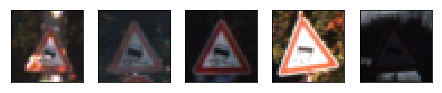

Traffic Sign 24: Road narrows on the right,  count:240 


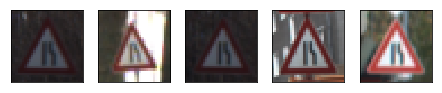

Traffic Sign 25: Road work,  count:1350 


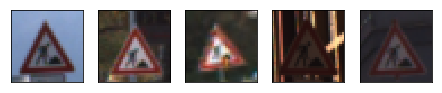

Traffic Sign 26: Traffic signals,  count:540 


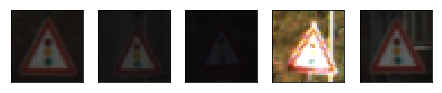

Traffic Sign 27: Pedestrians,  count:210 


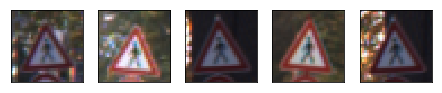

Traffic Sign 28: Children crossing,  count:480 


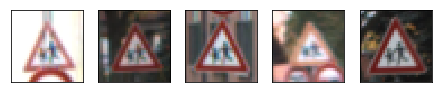

Traffic Sign 29: Bicycles crossing,  count:240 


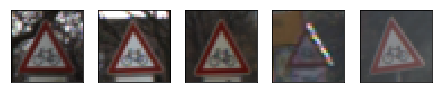

Traffic Sign 30: Beware of ice/snow,  count:390 


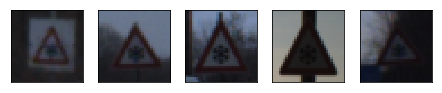

Traffic Sign 31: Wild animals crossing,  count:690 


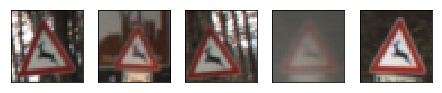

Traffic Sign 32: End of all speed and passing limits,  count:210 


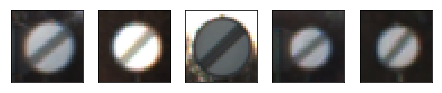

Traffic Sign 33: Turn right ahead,  count:599 


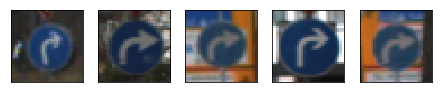

Traffic Sign 34: Turn left ahead,  count:360 


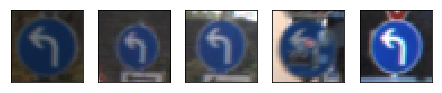

Traffic Sign 35: Ahead only,  count:1080 


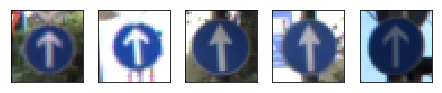

Traffic Sign 36: Go straight or right,  count:330 


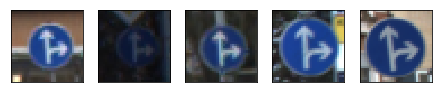

Traffic Sign 37: Go straight or left,  count:180 


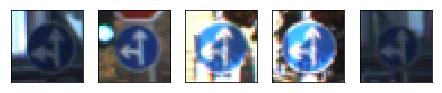

Traffic Sign 38: Keep right,  count:1860 


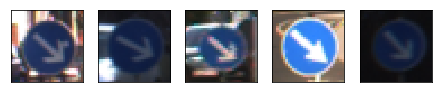

Traffic Sign 39: Keep left,  count:270 


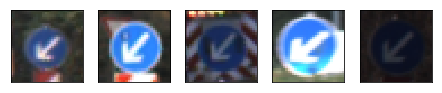

Traffic Sign 40: Roundabout mandatory,  count:300 


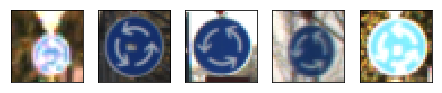

Traffic Sign 41: End of no passing,  count:210 


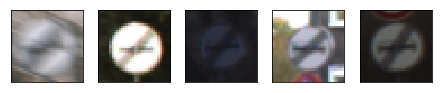

Traffic Sign 42: End of no passing by vehicles over 3.5 metric tons,  count:210 


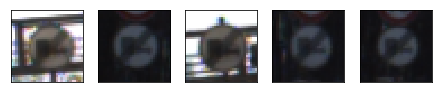

In [56]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplt
# Visualizations will be shown in the notebook.
%matplotlib inline


plt.figure(figsize=(6,6))
# plot Ratio of sizes of train, validation and test sets
plt.pie([y_train.shape[0],y_valid.shape[0],y_test.shape[0]], explode=[0.1,0.1,0.1], labels=['Train','Validation','Test'], 
        autopct='%1.1f%%', shadow=True, startangle=90,colors=['b','r','g'])
plt.title('Relative sizes of train, validation and test sets')
plt.axis('equal')
plt.show()

# plot frequency of each class of traffic sign in train, validation and test sets

for i_array,i_dataSetType, i_colour in [[y_train,'Trainig','blue'],[y_valid,'Validation','red'],[y_test,'Test','green']]:
    t_labels = sorted(set(i_array))
    t_frequency = [list(i_array).count(i) for i in t_labels]
    
    plt.figure(figsize=(12,4))
    plt.bar(t_labels,t_frequency,color=i_colour)
    plt.ylabel('Traffic sign frequency')
    plt.xlabel('Traffic sign id')
    plt.title('Frequency distribution of Traffic Signs in {} set'.format(i_dataSetType))

    plt.show()
# Compare frequency distributions of the three datasets

fig = pyplt.figure(figsize=(12,4),dpi = 80)
ax = fig.add_subplot(111)
diff = 0.3

#coculate frequency of each class in train, test and validation datasets
dataSet_Distribution={}
frequency_Distribution={}

for i_array,i_dataSetType in [[y_train,'Training'],[y_valid,'Validation'],[y_test,'Test']]:
    t_labels = sorted(set(i_array))
    frequency_Distribution[i_dataSetType] = [list(i_array).count(i) for i in t_labels]
    dataSet_Distribution[i_dataSetType]=[list(i_array).count(i)/i_array.size for i in t_labels]

#plot distribution of each data set
for i_array,i_dataSetType, i_colour,i_width in [[y_train,'Training','blue',-diff],[y_valid,'Validation','red',0],[y_test,'Test','green',diff]]:
    t_labels = sorted(set(i_array))
    t_frequency = [list(i_array).count(i)/i_array.size for i in t_labels]
    

    ax.bar([i+i_width for i in t_labels],t_frequency,color=i_colour, width=diff, align='center', label=i_dataSetType)
    ax.autoscale(tight=True)
pyplt.legend()
pyplt.ylabel('Traffic sign frequency in %')
pyplt.xlabel('Traffic sign id')
pyplt.title('% Frequency distribution of Traffic Signs')

pyplt.show()

import random

class_indices_in_trainingSet = [list(np.where(y_train==i_class)) for i_class in range(43)]
for i_class, i_class_index, c_count in zip(list(range(43)), class_indices_in_trainingSet, frequency_Distribution['Training']):
    print("Traffic Sign {}: {},  count:{} ".format (i_class, traffic_sign_names[i_class], c_count))
    fig = pyplt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    #print(len(c_index[0]),c_count)
    random_indices = random.sample(range(len(i_class_index[0])), 5)
    
    #display any 5 images for the class
    for i in range(5):
        axis = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[i_class_index[0][random_indices[i]]])
    pyplt.show()
    
#pyplt.bar( np.arange( 43 ), 43, align='center' )
#pyplt.xlabel('Class')
#pyplt.ylabel('Number of training examples')
#pyplt.xlim([-1, 43])
#pyplt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Pre-process the Data Set (normalization, grayscale, etc.)

The images are normalized so that each RGB pixel value ranges from -1.0 to 1.0. The 3 colour channels are NOT merged to form a single grayscale image (unlike MNIST), because colours are important clue to what kind of traffic sign an image contains.

In [57]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#normalize datasets so that the value of each pixel varies from -1 to 1


#def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#def allRgb2gray(X):
#    return np.array([rgb2gray(i_image)[...,np.newaxis] for i_image in X])
# convert images into grayscale if number of colour channels is 3


X_train = (X_train-128.0)/128.0
X_test  = (X_test -128.0)/128.0
X_valid = (X_valid-128.0)/128.0

print('Max value in X_train:',X_train.max(), ', Min value in X_train:',X_train.min())
print(X_train.shape)

Max value in X_train: 0.9921875 , Min value in X_train: -1.0
(34799, 32, 32, 3)


## Setup TensorFlow
Set `EPOCH`, `BATCH_SIZE` and dropout rate. Dropout rate is used to avoid overfitting the training set. Without using dropout, it was found that the model was performing poorly on validation set, i.e. it was overfitting.

In [58]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128
dropout_rate = 0.75

### Model Architecture

I have experimented with so many different configurations of the network. I have used the function with name 'LeNet()'.

I have taken network from LeNet lab, increased the size of layers and added dropout rate to be 0.75 after every layer, since I found that the network was overfitting on training images.

In [59]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)
    

    # SOLUTION: Pooling. Input = 28x28x20. Output = 14x14x30.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 30), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(30))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2,keep_prob)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x30.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x30. Output = 750.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 750. Output = 250.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(750, 250), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(250))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 250. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(250, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [60]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [61]:
rate = 0.001

logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
trainingNN = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [62]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

In training, the final validation accuracy varies by a percent or two. However, the final accuracy in all runs was more than 94%.

In [63]:
from sklearn.utils import shuffle

x_epochs = list(range(1,EPOCHS+1))
x_validation_accuracy = [0]*EPOCHS
x_training_accuracy = [0]*EPOCHS

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...\n")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(trainingNN, feed_dict={x: batch_x, y: batch_y,keep_prob:dropout_rate})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        training_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        
        x_validation_accuracy[i]=validation_accuracy
        x_training_accuracy[i]=training_accuracy
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.838
Training Accuracy = 0.915

EPOCH 2 ...
Validation Accuracy = 0.885
Training Accuracy = 0.964

EPOCH 3 ...
Validation Accuracy = 0.920
Training Accuracy = 0.982

EPOCH 4 ...
Validation Accuracy = 0.937
Training Accuracy = 0.992

EPOCH 5 ...
Validation Accuracy = 0.937
Training Accuracy = 0.994

EPOCH 6 ...
Validation Accuracy = 0.956
Training Accuracy = 0.995

EPOCH 7 ...
Validation Accuracy = 0.950
Training Accuracy = 0.997

EPOCH 8 ...
Validation Accuracy = 0.948
Training Accuracy = 0.995

EPOCH 9 ...
Validation Accuracy = 0.947
Training Accuracy = 0.997

EPOCH 10 ...
Validation Accuracy = 0.954
Training Accuracy = 0.999

EPOCH 11 ...
Validation Accuracy = 0.947
Training Accuracy = 0.998

EPOCH 12 ...
Validation Accuracy = 0.954
Training Accuracy = 0.998

EPOCH 13 ...
Validation Accuracy = 0.962
Training Accuracy = 0.999

EPOCH 14 ...
Validation Accuracy = 0.958
Training Accuracy = 0.998

EPOCH 15 ...
Validation Accuracy = 0.960
Tra

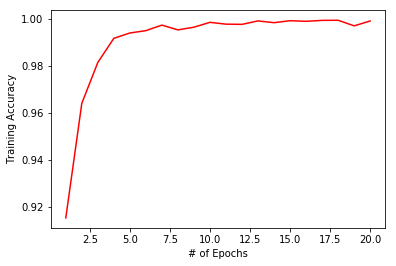

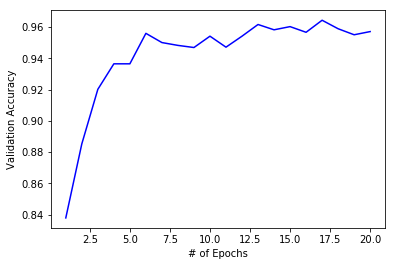

In [64]:
#plot training and validation accuracy
plt.figure()
plt.plot(x_epochs, x_training_accuracy,color='r')
plt.xlabel('# of Epochs')
plt.ylabel("Training Accuracy")
plt.show()

plt.figure()
plt.plot(x_epochs, x_validation_accuracy,color='b')
plt.xlabel('# of Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

## Evaluate the Model
The  model is evaluated  on the test set provided in 'test.p' file. A list of misclassified samples for each class is prepared. This initially helped me figure out what classes are being incorrectly labeled most frequently.

In [65]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    #find classes that are misclassified
    incorrect_classification = [0]*43;
    for i in range(X_valid.shape[0]):
        test_accuracy = evaluate(X_valid[i:i+1], y_valid[i:i+1])
        if test_accuracy <1:
            incorrect_classification[y_valid[i]]=incorrect_classification[y_valid[i]]+1

    # print # of misclassifications for each class
    print("Misclassified classes and number of samples misclassified:")
    train_class_frequency=[list(y_train).count(i) for i in range(43)]
    temp = [[i, traffic_sign_names[i], 
             incorrect_classification[i],
             train_class_frequency[i] ] for i in range(43)]
    temp=sorted(temp,key=lambda x: x[2],reverse=True)
    for i in range(43):
        print('{:50}: {:>4} {:>6}'.format(temp[i][1],temp[i][2],temp[i][3]))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.949
Misclassified classes and number of samples misclassified:
Roundabout mandatory                              :   27    300
Double curve                                      :   20    270
Dangerous curve to the right                      :   17    300
Speed limit (30km/h)                              :   16   1980
Speed limit (120km/h)                             :   16   1260
Road narrows on the right                         :   15    240
Road work                                         :   10   1350
Speed limit (80km/h)                              :    9   1650
Vehicles over 3.5 metric tons prohibited          :    9    360
Bumpy road                                        :    9    330
End of no passing                                 :    5    210
Speed limit (50km/h)                              :    3   2010
General caution                                   :    3   1080
Slippery road                        

---

## Step 3: Test a Model on New Images

6 new images are taken from the net. These images are manually scaled to 32x32.The model performs well and achieves accuracy of 100%.

### Load and Display the new test images

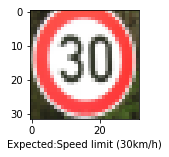

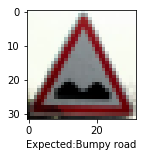

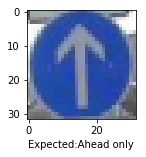

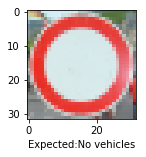

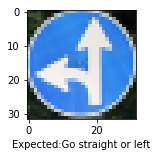

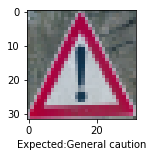

In [66]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

num_newtest_images = 6

X_newtest_images = np.zeros((num_newtest_images, 32,32,3))
y_newtest_images = np.array([1, 22, 35, 15,37,18])

isNewImageNormalized = False

for i in range(0,num_newtest_images):
    plt.figure(figsize=(2,2))
    plt.xlabel('Expected:{}'.format(traffic_sign_names[y_newtest_images[i]]))    
    i_image=mpimg.imread('newSignImages/'+str(i+1)+'.png')
    X_newtest_images[i]=i_image    
    plt.imshow(i_image)

### Predict the Sign Type for Each New Image

The model accurately identifies labels for 6 of the 6 new images.

In [67]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Create normalized, zero-mean versions of web images
if not isNewImageNormalized:
    image_pixel_range = X_newtest_images.max() - X_newtest_images.min()
    X_newtest_images = (X_newtest_images -image_pixel_range*0.5)/(0.5*image_pixel_range)
    
    #make sure that the new dataset is not normalized again by mistake
    isNewImageNormalized =True
print(X_newtest_images.max())

predicted_class = tf.argmax( logits, 1 )

# Redeclare in case you want to run this cell alone.
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the network
    saver.restore(sess, './lenet')
    output = sess.run(predicted_class, feed_dict={
        x: X_newtest_images, 
        keep_prob: 1.0})
    
print("{:>12}{:>30} {:>30}".format("Correct","Known labels", "Predicted classes:"))
print("Class Index")
print("------------------------------------------------------------------------")
for i in range(len(y_newtest_images)):
    print("{:<12}{:30} {:30}".format(y_newtest_images[i],traffic_sign_names[y_newtest_images[i]], traffic_sign_names[output[i]]))

1.0
INFO:tensorflow:Restoring parameters from ./lenet
     Correct                  Known labels             Predicted classes:
Class Index
------------------------------------------------------------------------
1           Speed limit (30km/h)           Speed limit (30km/h)          
22          Bumpy road                     Bumpy road                    
35          Ahead only                     Ahead only                    
15          No vehicles                    Turn right ahead              
37          Go straight or left            Go straight or left           
18          General caution                General caution               


### Analyze Performance

In [68]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_newtest_images, y_newtest_images)
    print("Test Accuracy = {:.3f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 83.333%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenet
Top 5 softmax probabilities for each new image:

Speed limit (30km/h):
|Probabilities        |     Predicted labels|
|:---------------------:|:---------------------------------------------:|
|0.9996358156204224   | Speed limit (30km/h)|
|0.00015810629702173173 | Speed limit (20km/h)|
|0.00015521689783781767 | Speed limit (50km/h)|
|2.1226473108981736e-05 |      General caution|
|1.3140557712176815e-05 | End of speed limit (80km/h)|


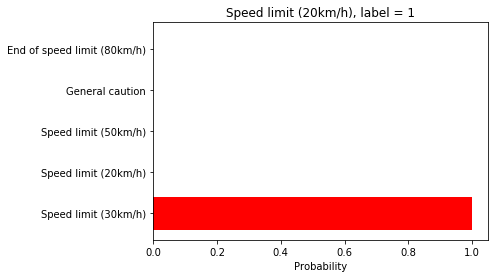


Bumpy road:
|Probabilities        |     Predicted labels|
|:---------------------:|:---------------------------------------------:|
|0.9999934434890747   |           Bumpy road|
|5.705704552383395e-06 |    Bicycles crossing|
|8.900020702640177e-07 |      Traffic signals|
|4.484685334205096e-08 | Road narrows on the right|
|1.0453048204794868e-08 |           Keep right|


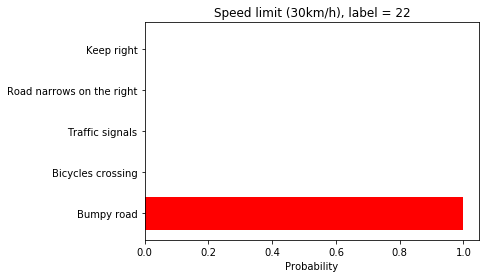


Ahead only:
|Probabilities        |     Predicted labels|
|:---------------------:|:---------------------------------------------:|
|0.9999904632568359   |           Ahead only|
|2.9291620649019023e-06 | Speed limit (60km/h)|
|2.1078315057820873e-06 | Go straight or right|
|1.6132599967022543e-06 | No passing for vehicles over 3.5 metric tons|
|9.015714681481768e-07 |     Turn right ahead|


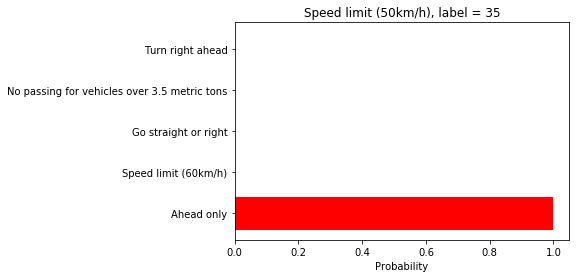


No vehicles:
|Probabilities        |     Predicted labels|
|:---------------------:|:---------------------------------------------:|
|0.7879161238670349   |     Turn right ahead|
|0.137698695063591    |                Yield|
|0.027010973542928696 |            Keep left|
|0.019071388989686966 |          No vehicles|
|0.0064646583050489426 | Speed limit (50km/h)|


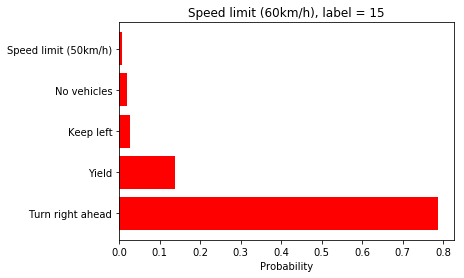


Go straight or left:
|Probabilities        |     Predicted labels|
|:---------------------:|:---------------------------------------------:|
|1.0                  |  Go straight or left|
|2.481715499769166e-09 | Roundabout mandatory|
|6.814666192456187e-11 |           Keep right|
|2.4955780497659674e-11 |      Traffic signals|
|1.65941652779944e-11 |      General caution|


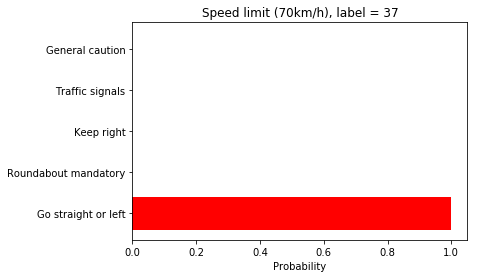


General caution:
|Probabilities        |     Predicted labels|
|:---------------------:|:---------------------------------------------:|
|1.0                  |      General caution|
|9.067903085314619e-14 |      Traffic signals|
|9.355417251618718e-20 |          Pedestrians|
|1.5163140376803613e-23 | Right-of-way at the next intersection|
|5.225170089303364e-24 |  Go straight or left|


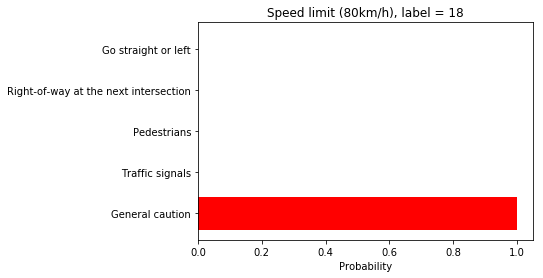

In [69]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top5Probabilities = tf.nn.top_k(tf.nn.softmax(logits),5)

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    top5ClassesAndProbabilities = sess.run(top5Probabilities, feed_dict={
        x: X_newtest_images, 
        keep_prob: 1.0})

print("Top 5 softmax probabilities for each new image:")

for i in range(6):
    print()
    print( "{}:".format( traffic_sign_names[y_newtest_images[i]]))
    print("|{:<20} | {:>20}|".format("Probabilities", "Predicted labels"))
    print("|:---------------------:|:---------------------------------------------:|")
    i_values = top5ClassesAndProbabilities.values[i]
    i_indices = top5ClassesAndProbabilities.indices[i]
    temp = list(zip(i_values,i_indices))
    temp.sort(key=lambda x: x[0], reverse = True)

    for j in range(5):        
        print("|{:<20} | {:>20}|".format(temp[j][0], traffic_sign_names[temp[j][1]]))

    plt.figure()
    #plt.xlabel('Class index')
    plt.xlabel('Probability')
    current_class_names = [traffic_sign_names[t[1]] for t in temp]
    plt.yticks(np.arange(5)+2, current_class_names)
    plt.barh(np.arange(5)+2,top5ClassesAndProbabilities.values[i], color='r', align= 'center')   
    plt.title("{}, label = {}".format( traffic_sign_names[i], y_newtest_images[i] ) )
    plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [70]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")